In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [3]:
vp_model = [2.7,6.2,6.8,7]
vp_model_erro = [0.3,0.2,0.3]

vpvs_model = [2,1.73,1.75,1.76]

H_model_1 = [0,-5,-25,-40]
H_model_2 = [-5,-25,-40,-50]

H_model_name_1 = [0.98,0.8,0.35,0.1]
H_model_name_2 = [0.95,0.75,0.3]
H_model_name_3 = [0.93,0.72,0.28]

layer_name = ['Parnaíba Basin','Upper Crust','Lower Crust','Mantle']

color_model = ['snow','lightgrey','grey','dimgrey']

In [4]:
H_basin = np.arange(0,-5.5,-0.5)
H_crust = [i*(-1)+35 for i in H_basin]

In [5]:
H_basin

array([ 0. , -0.5, -1. , -1.5, -2. , -2.5, -3. , -3.5, -4. , -4.5, -5. ])

# Segundo Stewart and Bland (1997) 
#### A razão Vp/Vs média é o produto do Somatório da espessura da camada mulplicado pela Razão Vp/Vs da camada ponderada pela espessura total

In [6]:

vp_vs = []
for i,j in enumerate(H_basin):
        vp_vs.append(((2*(j*-1))/H_crust[i])+(1.73*20)/H_crust[i]+(1.75*15)/H_crust[i])

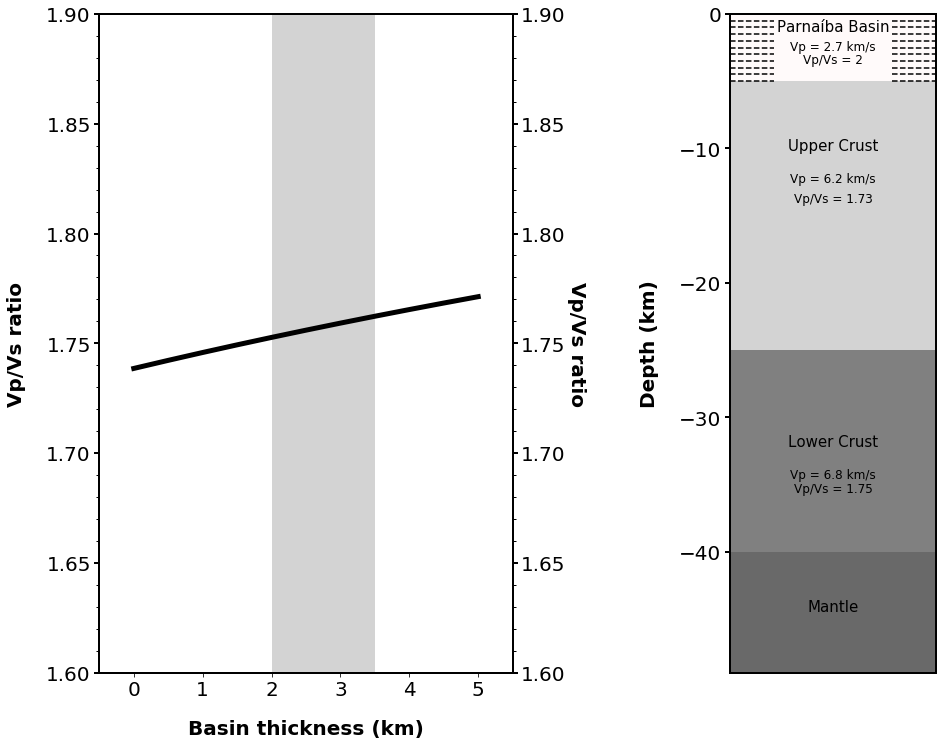

In [30]:
fig = plt.figure(figsize=(15,20))

rc('axes', linewidth=2)
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.major.size'] = 5
rcParams['ytick.minor.size'] = 3
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.width'] = 1

gs = plt.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1],height_ratios=[2, 1],wspace=0.7)

ax1 = plt.subplot(gs[0])
#ax1.hlines(1.78,0,5,linestyles='dashed',lw=3,label='GRJU Vp/Vs ratio')#GRJU Vp/Vs ratio
#ax1.axhspan(xmin=0, xmax=5,ymin=1.78-0.03,ymax=1.78+0.03, facecolor='blue',alpha=1,label='GRJU Vp/Vs ratio 2 '+r'$\sigma$')
#ax1.plot(3.5,1.78,'sk',markersize=10, markerfacecolor='grey',label='GRJU Vp/Vs ratio')#GRJU Vp/Vs ratio
#ax1.errorbar(3.5,1.78,yerr=0.03,ecolor='k',capsize=5,capthick=3)
#ax1.hlines(1.77,0,5,linestyles='dotted',lw=3,label='GENI Vp/Vs ratio')#GENI Vp/Vs ratio
#ax1.axhspan(xmin=0, xmax=5,ymin=1.77-0.03,ymax=1.77+0.03, facecolor='yellow',alpha=0.7,label='GENI Vp/Vs ratio 2 '+r'$\sigma$')
#ax1.plot(3.5,1.77,'sk',markersize=10, markerfacecolor='lightgrey',label='GENI Vp/Vs ratio')#GRJU Vp/Vs ratio
#ax1.errorbar(3.5,1.77,yerr=0.03,ecolor='k',capsize=5,capthick=3)
#ax1.vlines(3.5,1.6,1.9,linestyles='dashed')


ax1.plot(H_basin*(-1),vp_vs,'-k',lw=5,label='Vp/Vs Model')
ax1.set_ylim(1.6,1.9)
ax1.set_ylabel('Vp/Vs ratio',fontsize=20,labelpad=20,fontweight='bold')
ax1.set_xlabel('Basin thickness (km)',fontsize=20,labelpad=20,fontweight='bold')
ax1.axvspan(xmin=2, xmax=3.5,ymin=0,ymax=1, facecolor='lightgrey',alpha=1,label='basin depth range')

#ax1.annotate('Basin Depth',xy=(3.5,1.73), xycoords='data',
               # xytext=(4,1.70), textcoords='data',
               # arrowprops=dict(arrowstyle="->",
               #                 connectionstyle="arc3"))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1.set_xlim(-0.5,5.5)
#ax1.legend(loc=3)


ax1_a = ax1.twinx()
ax1_a.yaxis.set_major_locator(MultipleLocator(0.05))
ax1_a.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1_a.set_ylabel('Vp/Vs ratio',fontsize=20,rotation=270,labelpad=20,fontweight='bold')
ax1_a.set_ylim(1.6,1.9)


ax2 = plt.subplot(gs[1])
for i,j in enumerate(vp_model):
    ax2.axhspan(xmin=0, xmax=7,ymin=H_model_1[i],ymax=H_model_2[i], facecolor=color_model[i])

ax2.set_ylim(-49,0)
ax2.set_xlim(0,7)
ax2.set_xticks([])
ax2.set_ylabel('Depth (km)',fontsize=20,labelpad=20,fontweight='bold')
for i,j in enumerate(H_model_name_1):
    ax2.text(0.5,j,layer_name[i],fontsize=15,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
for i,j in enumerate(H_model_name_2):
    #ax2.text(0.5,H_model_name_2[i],'Vp = '+str(vp_model[i])+r'$\pm$'+str(vp_model_erro[i])+' km/s',fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
    ax2.text(0.5,H_model_name_2[i],'Vp = '+str(vp_model[i])+' km/s',fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
    ax2.text(0.5,H_model_name_3[i],'Vp/Vs = '+str(vpvs_model[i]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)

for i,j in enumerate(H_basin):
    ax2.hlines(j,0,1.5,linestyles='dashed')
    ax2.hlines(j,5.5,7,linestyles='dashed')
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/foward_modelling_vpvs_GENI_GRJU.pdf',dpi=300)

## Profundidades da bacia em cada estação

In [8]:
name_1 = ['BCDO','BPPF','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']
name = ['BPPF','BPPF','STSN','GRJU','GENI','BCDO','PRDT','STSR','BUCO','TRZN']
name_text = ['BPPF','STSN','GRJU','GENI','BCDO','PRDT','STSR','BUCO','TRZN']

In [9]:
org_list = np.argsort(np.array(name))

In [10]:
org_list

array([5, 0, 1, 8, 4, 3, 6, 2, 7, 9])

In [11]:
name_1 = ['BCDO','BPPF','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']
name = ['BPPF','BPPF','STSN','GRJU','GENI','BCDO','PRDT','STSR','BUCO','TRZN']
name_text = ['BPPF','STSN','GRJU','GENI','BCDO','PRDT','STSR','BUCO','TRZN']
name_index_text = [4, 0, 7, 3, 2, 5, 1, 6, 8]
name_index = [4, 0, 0, 7, 3, 2, 5, 1, 6, 8]
Basin_depth = [2.5,2,2,2.5,3.5,3.5,2,2.5,2,2]
H_moho = [43.7,45.8,42.7,39.3,45.1,43.6,41.1,42.2,40.0,40.3]
H_moho_erro = [0.5,0.2,1.5,0.5,0.8,0.7,1.9,0.7,0.4,1.1]
VpVs = [1.73,1.73,1.74,1.73,1.77,1.78,1.77,1.73,1.70,1.71]
VpVs_erro = [0.02,0.02,0.03,0.02,0.03,0.02,0.07,0.02,0.01,0.02]

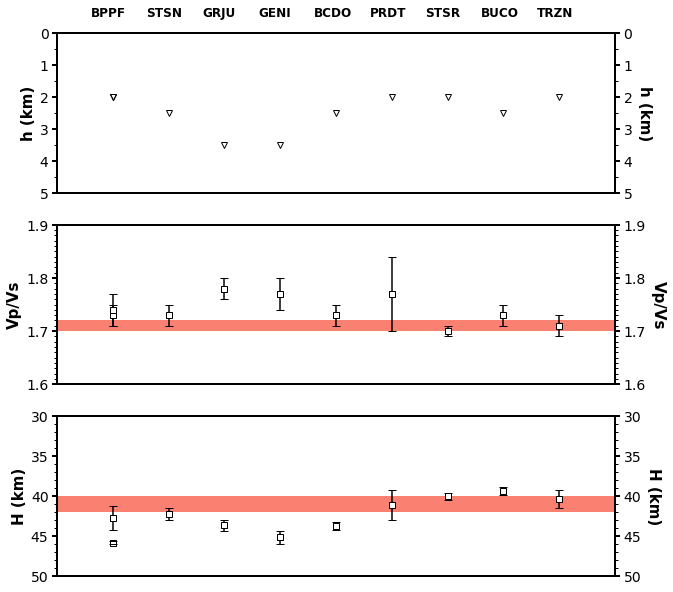

In [31]:
fig = plt.figure(figsize=(10,10))
rc('axes', linewidth=2)
rcParams['ytick.labelsize'] = 14
rcParams['ytick.major.size'] = 5
rcParams['ytick.minor.size'] = 3
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.width'] = 1

gs = plt.GridSpec(nrows=3, ncols=1)
ax1 = plt.subplot(gs[0])

for i,j in enumerate(name_index_text):
    ax1.text(j-0.4,-0.5,name_text[j],fontsize=12,fontweight='bold')

for i,j in enumerate(org_list):
    ax1.plot(name_index[i],Basin_depth[i],'vk',markerfacecolor='none')
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel('h (km)',fontsize=15,fontweight='bold')
ax1.set_ylim(5,0)
ax1.set_xticks([])
ax1.set_xlim(-1,9)
ax1_a = ax1.twinx()
ax1_a.yaxis.set_major_locator(MultipleLocator(1))
ax1_a.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1_a.set_ylabel('h (km)',fontsize=15,rotation=270,labelpad=20,fontweight='bold')
ax1_a.set_ylim(5,0)


ax2 = plt.subplot(gs[1])
for i,j in enumerate(org_list):
    ax2.plot(name_index[i],VpVs[i],'sk', markerfacecolor='white')
    ax2.errorbar(name_index[i],VpVs[i],yerr=VpVs_erro[i],ecolor='k',capsize=4,capthick=1)
ax2.axhspan(xmin=0, xmax=8,ymin=1.70,ymax=1.72, facecolor="salmon")
ax2.yaxis.set_major_locator(MultipleLocator(0.1))
ax2.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2.set_xlim(-1,9)
ax2.set_ylim(1.6,1.9)
ax2.set_xticks([])
ax2.set_ylabel('Vp/Vs',fontsize=15,fontweight='bold')
ax2_a = ax2.twinx()
ax2_a.yaxis.set_major_locator(MultipleLocator(0.1))
ax2_a.yaxis.set_minor_locator(MultipleLocator(0.01))
ax2_a.set_ylim(1.6,1.9)
ax2_a.set_ylabel('Vp/Vs',fontsize=15,rotation=270,labelpad=20,fontweight='bold')



ax3 = plt.subplot(gs[2])
for i,j in enumerate(org_list):
    ax3.plot(name_index[i],H_moho[i],'sk', markerfacecolor='white')
    ax3.errorbar(name_index[i],H_moho[i],yerr=H_moho_erro[i],ecolor='k',capsize=4,capthick=1)
ax3.axhspan(xmin=0, xmax=8,ymin=40,ymax=42, facecolor="salmon")
ax3.set_ylim(50,30)
ax3.set_xlim(-1,9)
ax3.set_xticks([])
ax3.set_ylabel('H (km)',fontsize=15,fontweight='bold')
ax3.yaxis.set_major_locator(MultipleLocator(5))
ax3.yaxis.set_minor_locator(MultipleLocator(1))
ax3_a = ax3.twinx()
ax3_a.yaxis.set_major_locator(MultipleLocator(5))
ax3_a.yaxis.set_minor_locator(MultipleLocator(1))
ax3_a.set_ylim(50,30)
ax3_a.set_ylabel('H (km)',fontsize=15,rotation=270,labelpad=20,fontweight='bold')
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/basin_depth_vpvs_Moho.pdf',dpi=300)

## TESTE

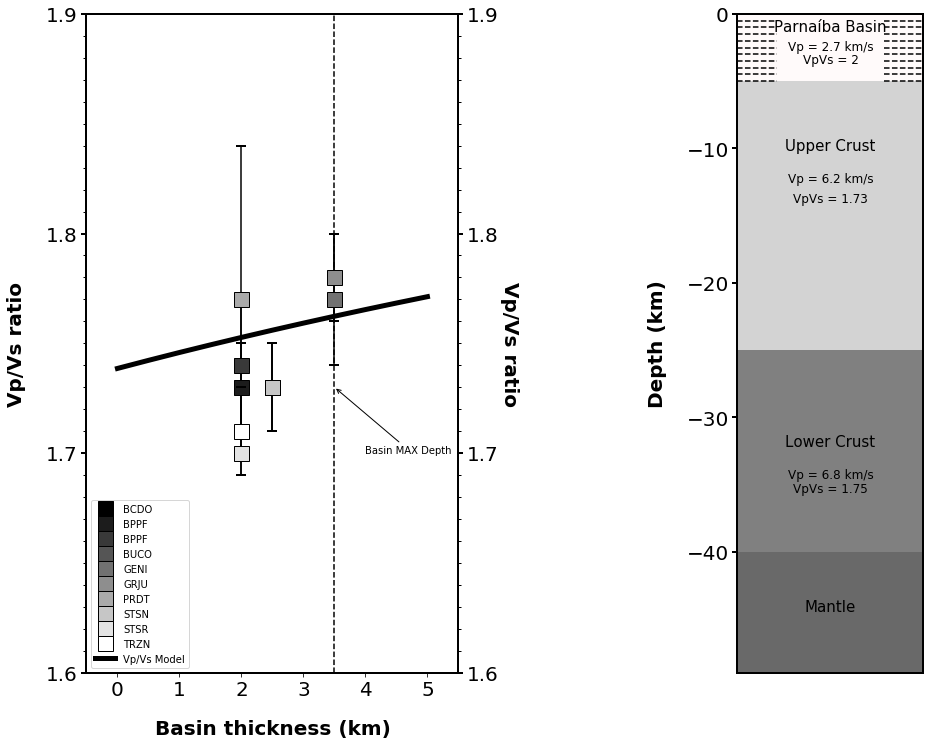

In [13]:
fig = plt.figure(figsize=(15,20))

rc('axes', linewidth=2)
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['ytick.major.size'] = 5
rcParams['ytick.minor.size'] = 3
rcParams['ytick.major.width'] = 2
rcParams['ytick.minor.width'] = 1
color_sta = np.linspace(0,1,10)
#color_sta = ['r','k','g','m','grey','y','b','pink','red','orange']

gs = plt.GridSpec(nrows=2, ncols=2, width_ratios=[2, 1],height_ratios=[2, 1],wspace=1)

ax1 = plt.subplot(gs[0])

for i,j in enumerate(org_list):
    ax1.plot(Basin_depth[i],VpVs[i],'sk', markerfacecolor=str(color_sta[i]),markersize=15,label=name_1[i])
    ax1.errorbar(Basin_depth[i],VpVs[i],yerr=VpVs_erro[i],ecolor='k',capsize=5,capthick=2)


ax1.vlines(3.5,1.6,1.9,linestyles='dashed')

ax1.plot(H_basin*(-1),vp_vs,'-k',lw=5,label='Vp/Vs Model')
ax1.set_ylim(1.6,1.9)
ax1.set_ylabel('Vp/Vs ratio',fontsize=20,labelpad=20,fontweight='bold')
ax1.set_xlabel('Basin thickness (km)',fontsize=20,labelpad=20,fontweight='bold')

ax1.annotate('Basin MAX Depth',xy=(3.5,1.73), xycoords='data',
                xytext=(4,1.70), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
ax1.yaxis.set_major_locator(MultipleLocator(0.1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.01))

ax1.set_xlim(-0.5,5.5)
ax1.legend(loc=3)

ax1_a = ax1.twinx()
ax1_a.yaxis.set_major_locator(MultipleLocator(0.1))
ax1_a.yaxis.set_minor_locator(MultipleLocator(0.01))
ax1_a.set_ylabel('Vp/Vs ratio',fontsize=20,rotation=270,labelpad=20,fontweight='bold')
ax1_a.set_ylim(1.6,1.9)


ax2 = plt.subplot(gs[1])
for i,j in enumerate(vp_model):
    ax2.axhspan(xmin=0, xmax=7,ymin=H_model_1[i],ymax=H_model_2[i], facecolor=color_model[i])

ax2.set_ylim(-49,0)
ax2.set_xlim(0,7)
ax2.set_xticks([])
ax2.set_ylabel('Depth (km)',fontsize=20,labelpad=20,fontweight='bold')
for i,j in enumerate(H_model_name_1):
    ax2.text(0.5,j,layer_name[i],fontsize=15,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
for i,j in enumerate(H_model_name_2):
    #ax2.text(0.5,H_model_name_2[i],'Vp = '+str(vp_model[i])+r'$\pm$'+str(vp_model_erro[i])+' km/s',fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
    ax2.text(0.5,H_model_name_2[i],'Vp = '+str(vp_model[i])+' km/s',fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)
    ax2.text(0.5,H_model_name_3[i],'VpVs = '+str(vpvs_model[i]),fontsize=12,horizontalalignment='center',verticalalignment='center',transform=ax2.transAxes)

for i,j in enumerate(H_basin):
    ax2.hlines(j,0,1.5,linestyles='dashed')
    ax2.hlines(j,5.5,7,linestyles='dashed')
fig.savefig('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/foward_modelling_vpvs.pdf',dpi=300)